In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import mitosheet
import klib
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
raw_data = pd.read_csv(r'E:\Proyects\Python proyects\Datasets\Real_estate_price_prediction.csv')
data = raw_data.copy()
data

In [5]:
import mitosheet
mitosheet.sheet(data, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-112d8cba-6c63-40f6-87af-d066acad88eb", "code": {"imports…

In [6]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
data.shape

(414, 8)

In [8]:
data.nunique()

No                                        414
X1 transaction date                        12
X2 house age                              236
X3 distance to the nearest MRT station    259
X4 number of convenience stores            11
X5 latitude                               234
X6 longitude                              232
Y house price of unit area                270
dtype: int64

In [9]:
data.rename(columns = {'X1 transaction date': 'x1_transaction_date', 'X2 house age': 'x2_house_age_(years)',
                       'X3 distance to the nearest MRT station': 'x3_nearest_mrt_station_(meters)', 'X4 number of convenience stores': 'x4_number_of_convenience_stores', 
                       'X5 latitude': 'x5_latitude', 'X6 longitude': 'x6_longitude', 'Y house price of unit area': 'y_house_price_of_unit_area'}, inplace = True)

In [10]:
data.head()

,No,x1_transaction_date,x2_house_age_(years),x3_nearest_mrt_station_(meters),x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [11]:
data = data.round({'x1_transaction_date': 1, 'x3_nearest_mrt_station_(meters)': 1})

In [12]:
data.head()

,No,x1_transaction_date,x2_house_age_(years),x3_nearest_mrt_station_(meters),x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
0,1,2012.9,32.0,84.9,10,24.98298,121.54024,37.9
1,2,2012.9,19.5,306.6,9,24.98034,121.53951,42.2
2,3,2013.6,13.3,562.0,5,24.98746,121.54391,47.3
3,4,2013.5,13.3,562.0,5,24.98746,121.54391,54.8
4,5,2012.8,5.0,390.6,5,24.97937,121.54245,43.1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   No                               414 non-null    int64  
 1   x1_transaction_date              414 non-null    float64
 2   x2_house_age_(years)             414 non-null    float64
 3   x3_nearest_mrt_station_(meters)  414 non-null    float64
 4   x4_number_of_convenience_stores  414 non-null    int64  
 5   x5_latitude                      414 non-null    float64
 6   x6_longitude                     414 non-null    float64
 7   y_house_price_of_unit_area       414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [14]:
klib.corr_mat(data)

,No,x1_transaction_date,x2_house_age_(years),x3_nearest_mrt_station_(meters),x4_number_of_convenience_stores,x5_latitude,x6_longitude,y_house_price_of_unit_area
No,1.00,-0.06,-0.03,-0.01,-0.01,-0.01,-0.01,-0.03
x1_transaction_date,-0.06,1.00,0.02,0.06,0.01,0.03,-0.04,0.09
x2_house_age_(years),-0.03,0.02,1.00,0.03,0.05,0.05,-0.05,-0.21
x3_nearest_mrt_station_(meters),-0.01,0.06,0.03,1.00,-0.60,-0.59,-0.81,-0.67
x4_number_of_convenience_stores,-0.01,0.01,0.05,-0.60,1.00,0.44,0.45,0.57
x5_latitude,-0.01,0.03,0.05,-0.59,0.44,1.00,0.41,0.55
x6_longitude,-0.01,-0.04,-0.05,-0.81,0.45,0.41,1.00,0.52
y_house_price_of_unit_area,-0.03,0.09,-0.21,-0.67,0.57,0.55,0.52,1.00


In [27]:
y = data['y_house_price_of_unit_area']

x = data[['x1_transaction_date','x2_house_age_(years)','x3_nearest_mrt_station_(meters)','x4_number_of_convenience_stores','x5_latitude','x6_longitude']]

In [28]:
x = sm.add_constant(x.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.583
Model:                                    OLS   Adj. R-squared:                  0.577
Method:                         Least Squares   F-statistic:                     94.76
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           3.96e-74
Time:                                20:53:10   Log-Likelihood:                -1486.8
No. Observations:                         414   AIC:                             2988.
Df Residuals:                             407   BIC:                             3016.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.486e+04   6802.818     -2.184      0.030   -2.82e+04   -1484.678
x1             5.3858      1.599      3.369      0.001       2.243       8.528
x2            -0.2707      0.039     -7.028      0.000      -0.346      -0.195
x3            -0.0045      0.001     -6.265      0.000      -0.006      -0.003
x4             1.1318      0.188      6.018      0.000       0.762       1.502
x5           225.6838     44.533      5.068      0.000     138.140     313.228
x6           -12.9732     48.561     -0.267      0.789    -108.436      82.489
==============================================================================
Omnibus:                      232.835   Durbin-Watson:                   2.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3647.561
Skew:                           2.038   Prob(JB):                         0.00
Kurtosis:                      16.959   Cond. No.                     3.73e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Ploting the variables: 'y_house_price_of_unit_area' and 'x1_transaction_date'

In [29]:
y = data['y_house_price_of_unit_area']
x1 = data['x1_transaction_date']

In [30]:
x = sm.add_constant(x1.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.007
Model:                                    OLS   Adj. R-squared:                  0.005
Method:                         Least Squares   F-statistic:                     3.110
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):             0.0786
Time:                                20:53:16   Log-Likelihood:                -1666.1
No. Observations:                         414   AIC:                             3336.
Df Residuals:                             412   BIC:                             3344.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8597.2955   4896.876     -1.756      0.080   -1.82e+04    1028.683
x1             4.2894      2.432      1.763      0.079      -0.492       9.071
==============================================================================
Omnibus:                       43.477   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.054
Skew:                           0.571   Prob(JB):                     3.77e-21
Kurtosis:                       5.037   Cond. No.                     1.48e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

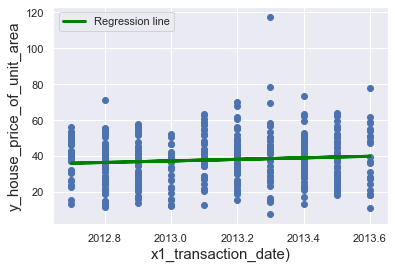

In [38]:
plt.scatter(x1,y)
yhat = 4.2894*x1+ -8597.2955   # Linear Regression Equation
fig = plt.plot(x1,yhat,lw=3, c='green', label='Regression line')
plt.xlabel('x1_transaction_date)',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Ploting the variables: 'y_house_price_of_unit_area' and 'x2_house_age_(years)'

In [39]:
y = data['y_house_price_of_unit_area']
x2 = data['x2_house_age_(years)']

In [40]:
x = sm.add_constant(x2.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.044
Model:                                    OLS   Adj. R-squared:                  0.042
Method:                         Least Squares   F-statistic:                     19.11
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           1.56e-05
Time:                                21:03:21   Log-Likelihood:                -1658.3
No. Observations:                         414   AIC:                             3321.
Df Residuals:                             412   BIC:                             3329.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.4347      1.211     35.042      0.000      40.054      44.815
x1            -0.2515      0.058     -4.372      0.000      -0.365      -0.138
==============================================================================
Omnibus:                       48.404   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.054
Skew:                           0.589   Prob(JB):                     1.40e-26
Kurtosis:                       5.348   Cond. No.                         39.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

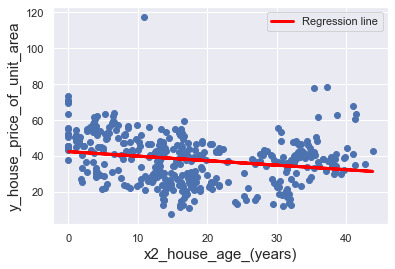

In [41]:
plt.scatter(x2,y)
yhat = -0.2515*x2 + 42.4347   # Linear Regression Equation 
fig = plt.plot(x2,yhat, lw=3, c='red', label='Regression line')
plt.xlabel('x2_house_age_(years)',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Ploting the variables: 'y_house_price_of_unit_area' and 'x3_nearest_mrt_station_(meters)'

In [42]:
y = data['y_house_price_of_unit_area']
x3 = data['x3_nearest_mrt_station_(meters)']

In [43]:
x = sm.add_constant(x3.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.454
Model:                                    OLS   Adj. R-squared:                  0.452
Method:                         Least Squares   F-statistic:                     342.2
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           4.65e-56
Time:                                21:19:25   Log-Likelihood:                -1542.5
No. Observations:                         414   AIC:                             3089.
Df Residuals:                             412   BIC:                             3097.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.8514      0.653     70.258      0.000      44.569      47.134
x1            -0.0073      0.000    -18.500      0.000      -0.008      -0.006
==============================================================================
Omnibus:                      140.819   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              988.263
Skew:                           1.263   Prob(JB):                    2.52e-215
Kurtosis:                      10.135   Cond. No.                     2.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

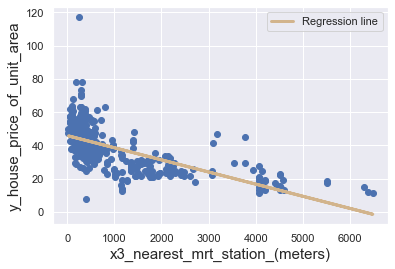

In [51]:
plt.scatter(x3,y)
yhat = -0.0073*x3 + 45.8514   # Linear Regression Equation
fig = plt.plot(x3,yhat, lw=3, c='tan', label='Regression line')
plt.xlabel('x3_nearest_mrt_station_(meters)',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Ploting the variables: 'y_house_price_of_unit_area' and 'x4_number_of_convenience_stores'

In [46]:
y = data['y_house_price_of_unit_area']
x4 = data['x4_number_of_convenience_stores']

In [47]:
x = sm.add_constant(x4.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.326
Model:                                    OLS   Adj. R-squared:                  0.324
Method:                         Least Squares   F-statistic:                     199.3
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           3.41e-37
Time:                                21:30:44   Log-Likelihood:                -1586.0
No. Observations:                         414   AIC:                             3176.
Df Residuals:                             412   BIC:                             3184.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1811      0.942     28.857      0.000      25.330      29.033
x1             2.6377      0.187     14.118      0.000       2.270       3.005
==============================================================================
Omnibus:                      171.927   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1417.242
Skew:                           1.553   Prob(JB):                    1.78e-308
Kurtosis:                      11.516   Cond. No.                         8.87
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

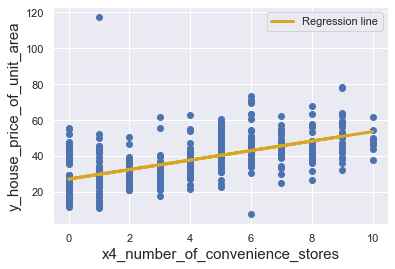

In [48]:
plt.scatter(x4,y)
yhat = 2.6377*x4 + 27.1811   # Linear Regression Equation
fig = plt.plot(x4,yhat, lw=3, c='goldenrod', label='Regression line')
plt.xlabel('x4_number_of_convenience_stores',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Ploting the variables: 'y_house_price_of_unit_area' and 'x5_latitude'

In [49]:
y = data['y_house_price_of_unit_area']
x5 = data['x5_latitude']

In [50]:
x = sm.add_constant(x5.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.298
Model:                                    OLS   Adj. R-squared:                  0.297
Method:                         Least Squares   F-statistic:                     175.3
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           1.39e-33
Time:                                21:39:16   Log-Likelihood:                -1594.3
No. Observations:                         414   AIC:                             3193.
Df Residuals:                             412   BIC:                             3201.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.492e+04   1129.665    -13.205      0.000   -1.71e+04   -1.27e+04
x1           598.9683     45.243     13.239      0.000     510.033     687.904
==============================================================================
Omnibus:                      116.094   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              503.595
Skew:                           1.158   Prob(JB):                    4.42e-110
Kurtosis:                       7.881   Cond. No.                     5.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

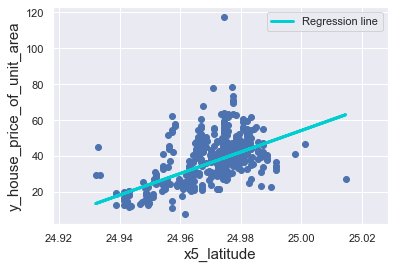

In [52]:
plt.scatter(x5,y)
yhat = 598.9683*x5 + -1.492e+04   # Linear Regression Equation
fig = plt.plot(x5,yhat, lw=3, c='darkturquoise', label='Regression line')
plt.xlabel('x5_latitude',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Ploting the variables: 'y_house_price_of_unit_area' and 'x6_longitude'

In [53]:
y = data['y_house_price_of_unit_area']
x6 = data['x6_longitude']

In [54]:
x = sm.add_constant(x6.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.274
Model:                                    OLS   Adj. R-squared:                  0.272
Method:                         Least Squares   F-statistic:                     155.4
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           1.77e-30
Time:                                21:48:32   Log-Likelihood:                -1601.5
No. Observations:                         414   AIC:                             3207.
Df Residuals:                             412   BIC:                             3215.
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.635e+04   4523.596    -12.456      0.000   -6.52e+04   -4.75e+04
x1           463.9347     37.221     12.464      0.000     390.768     537.102
==============================================================================
Omnibus:                       92.184   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              595.015
Skew:                           0.765   Prob(JB):                    6.23e-130
Kurtosis:                       8.670   Cond. No.                     9.64e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.64e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

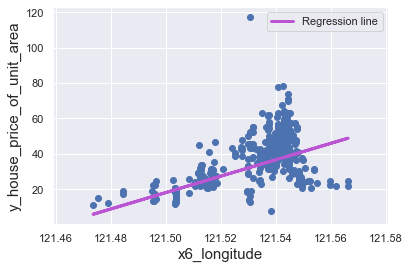

In [55]:
plt.scatter(x6,y)
yhat = 463.9347*x6 + -5.635e+04  # Linear Regression Equation
fig = plt.plot(x6,yhat, lw=3, c='mediumorchid', label='Regression line')
plt.xlabel('x6_longitude',fontsize=15)
plt.ylabel('y_house_price_of_unit_area',fontsize=15)
plt.legend()
plt.show()

## Seeking the best linear equation

In [64]:
y = data['y_house_price_of_unit_area']

x7 = data[['x1_transaction_date','x2_house_age_(years)','x3_nearest_mrt_station_(meters)','x4_number_of_convenience_stores','x5_latitude']]

In [65]:
x = sm.add_constant(x7.values)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.583
Model:                                    OLS   Adj. R-squared:                  0.578
Method:                         Least Squares   F-statistic:                     114.0
Date:                        Wed, 20 Oct 2021   Prob (F-statistic):           3.65e-75
Time:                                21:57:36   Log-Likelihood:                -1486.8
No. Observations:                         414   AIC:                             2986.
Df Residuals:                             408   BIC:                             3010.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.644e+04   3314.974     -4.961      0.000    -2.3e+04   -9927.608
x1             5.3723      1.596      3.366      0.001       2.235       8.509
x2            -0.2704      0.038     -7.031      0.000      -0.346      -0.195
x3            -0.0044      0.000     -8.898      0.000      -0.005      -0.003
x4             1.1348      0.188      6.051      0.000       0.766       1.503
x5           227.1563     44.141      5.146      0.000     140.385     313.927
==============================================================================
Omnibus:                      234.064   Durbin-Watson:                   2.154
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3695.663
Skew:                           2.050   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.82e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.82e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Linear Regression Equation

## yhat = 5.3723*x1 + -0.2704*x2 + -0.0044*x3 + 1.1348*x4 + 227.1563*x5 + -1.644e+04